In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/improved-optimized-distill-model/pytorch/default/1/optimized_distilbert/config.json
/kaggle/input/improved-optimized-distill-model/pytorch/default/1/optimized_distilbert/tokenizer_config.json
/kaggle/input/improved-optimized-distill-model/pytorch/default/1/optimized_distilbert/model.safetensors
/kaggle/input/improved-optimized-distill-model/pytorch/default/1/optimized_distilbert/special_tokens_map.json
/kaggle/input/improved-optimized-distill-model/pytorch/default/1/optimized_distilbert/vocab.txt
/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv
/kaggle/input/twitter-hate-speech/test_tweets_anuFYb8.csv


In [2]:
df_test = pd.read_csv("/kaggle/input/twitter-hate-speech/test_tweets_anuFYb8.csv")

In [3]:
df_test.shape

(17197, 2)

In [4]:
import emoji
def emoji_text_trans(text):
    text= emoji.demojize(text).replace (':', ' ')

    #delete repeated emoji 
    tokenize= text.split()
    repeated_list=[]
    for word in tokenize:
        if word not in repeated_list:
            repeated_list.append(word)

    text=' '.join(word for word in repeated_list)
    text= text.replace("_", " ").replace("-", " ")
    return text

In [5]:
#Repeated char function 
def repeated_char(text):
  text = re.sub(r'(\w)\1{2,}',r'\1',text)
  return text

In [6]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text) # remove URLs
    text = re.sub(r"@\w+", "", text) #remove mentions
    text = re.sub(r"#\w+", "", text) #remove hashtags
    #text = re.sub(r"[^\w\s]", "", text) #remove special characters
    return text.lower().strip()

In [7]:
def contains_invalid_encoding(text):
    # Kiểm tra nếu text là chuỗi và tìm ký tự không hợp lệ
    if isinstance(text, str):
        # Regex tìm các ký tự không phải Unicode hợp lệ (biểu hiện của mã hóa sai)
        return bool(re.search(r'[^\x00-\x7F]+', text))  # Tìm ký tự ngoài bảng mã ASCII chuẩn
    return False  # Nếu không phải chuỗi, trả về False

In [8]:
def decode_text(text):
    try:
        #Handling the characters's error
        return text.encode('latin1').decode('utf-8', errors='ignore')
    except UnicodeDecodeError:
        return text

In [9]:
import re
df_test['cleaned_tweet']= df_test['tweet'].apply(clean_text)
# Đảm bảo cột 'tweet' là kiểu chuỗi trước khi áp dụng hàm kiểm tra
df_test['cleaned_tweet'] = df_test['cleaned_tweet'].astype(str)

# Tạo một cột mới để lưu tweet đã được mã hóa lại
df_test['decoded_tweet'] = df_test['cleaned_tweet'].apply(lambda x: decode_text(x) if contains_invalid_encoding(x) else x)
df_test['clean_duplicate']=df_test['decoded_tweet'].apply(repeated_char)
df_test["deemoji_tweet"] = df_test["clean_duplicate"].apply(emoji_text_trans)

In [10]:
df_test

,id,tweet,cleaned_tweet,decoded_tweet,clean_duplicate,deemoji_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,to find ¦,to find,to find,to find
1,31964,@user #white #supremacists want everyone to s...,want everyone to see the new â  â and ...,want everyone to see the new ‘ — and here’s...,want everyone to see the new ‘ — and here’s...,want everyone to see the new ‘ — and here’s why
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your !! !!,safe ways to heal your !! !!,safe ways to heal your !! !!,safe ways to heal your !!
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,is the hp and cursed child book up for reserva...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd to my amazing, hilarious eli ahmir! uncl...","3rd to my amazing, hilarious eli ahmir! uncl...","3rd to my amazing, hilarious eli ahmir! uncl...","3rd to my amazing, hilarious eli ahmir! uncle ..."
...,...,...,...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! ...,thought factory: left-right polarisation! ...,thought factory: left-right polarisation! ...,thought factory left right polarisation! &gt;3
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð â¦,feeling like a mermaid 😘 …,feeling like a mermaid 😘 …,feeling like a mermaid face blowing a kiss …
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,"today in ((omg)) &amp; used words like ""assets...","today in ((omg)) &amp; used words like ""assets...","today in ((omg)) &amp; used words like ""assets...","today in ((omg)) &amp; used words like ""assets..."
17195,49158,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads...","happy, at work conference right mindset leads ..."


In [12]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Đường dẫn tới các file model và tokenizer
model_path = '/kaggle/input/improved-optimized-distill-model/pytorch/default/1/optimized_distilbert'

# Tải các file tokenizer và model thủ công từ đường dẫn
tokenizer = DistilBertTokenizer.from_pretrained(model_path, local_files_only=True)
model = DistilBertForSequenceClassification.from_pretrained(model_path, local_files_only=True)

# Chuyển model vào chế độ đánh giá
model.eval()

# Kiểm tra xem có GPU không và chuyển model vào GPU nếu có
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [13]:
# Tokenize dữ liệu
texts = df_test['deemoji_tweet'].tolist()

encoded_inputs = tokenizer(
    texts,
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="pt"
)

input_ids = encoded_inputs['input_ids']
attention_mask = encoded_inputs['attention_mask']

# Chuyển dữ liệu vào GPU (nếu có)
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)

# Chế độ đánh giá (không cần tính toán gradient)
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)  # Lấy nhãn có xác suất cao nhất

# Chuyển các dự đoán thành nhãn
predicted_labels = predictions.cpu().numpy()

# Thêm nhãn dự đoán vào DataFrame
df_test['predicted_labels'] = predicted_labels

# In kết quả
print(df_test[['deemoji_tweet', 'predicted_labels']])


                                           deemoji_tweet  predicted_labels
0                                                to find                 0
1        want everyone to see the new ‘ — and here’s why                 0
2                              safe ways to heal your !!                 0
3      is the hp and cursed child book up for reserva...                 0
4      3rd to my amazing, hilarious eli ahmir! uncle ...                 0
...                                                  ...               ...
17192     thought factory left right polarisation! &gt;3                 1
17193       feeling like a mermaid face blowing a kiss …                 0
17194  today in ((omg)) &amp; used words like "assets...                 0
17195  happy, at work conference right mindset leads ...                 0
17196                   my song "so glad" free download!                 0

[17197 rows x 2 columns]


In [14]:
df_test[['deemoji_tweet', 'predicted_labels']]

,deemoji_tweet,predicted_labels
0,to find,0
1,want everyone to see the new ‘ — and here’s why,0
2,safe ways to heal your !!,0
3,is the hp and cursed child book up for reserva...,0
4,"3rd to my amazing, hilarious eli ahmir! uncle ...",0
...,...,...
17192,thought factory left right polarisation! &gt;3,1
17193,feeling like a mermaid face blowing a kiss …,0
17194,"today in ((omg)) &amp; used words like ""assets...",0
17195,"happy, at work conference right mindset leads ...",0


In [ ]:
df_test

In [ ]:
import pandas as pd

# Giả sử df là DataFrame của bạn
df_test.to_csv('/kaggle/working/predict_df.csv', index=False)  # Lưu file mà không cần lưu chỉ mục


In [15]:
df_test[df_test["predicted_labels"]==1][["deemoji_tweet","predicted_labels"]]

,deemoji_tweet,predicted_labels
19,thought factory bbc neutrality on right wing f...,1
26,chick gets fucked hottest naked lady,1
33,suppo the fisherman! no bullying! racism!,1
34,i say we because i'm speaking collectively. i'...,1
59,let's do this thing!,1
...,...,...
17125,be careful in criticizing for his decision on ...,1
17128,the uk government’s new semitism definition c...,1
17176,are the most racist pay ever!!!!!,1
17188,"black professor demonizes, proposes nazi style...",1


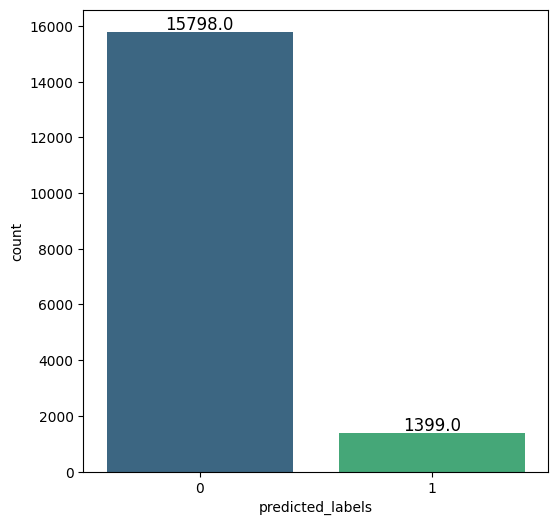

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_test, x="predicted_labels", palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # Adjust text position (optional)
                textcoords='offset points')

# Show the plot
plt.show()

In [17]:
tweets = [
    {"text": "I can't stand those people! They ruin everything!", "label": "hate-speech"},
    {"text": "at work attorneys for white officer who shot remove black judge from presiding over trial.", "label": "hate-speech"},
    {"text": "Those idiots shouldn't even be allowed in our country!", "label": "hate-speech"},
    {"text": "They are nothing but trouble. Keep them away!", "label": "hate-speech"},
    {"text": "I love how diverse our community is becoming!", "label": "non-hate-speech"},
    {"text": "We should always work together to solve our differences peacefully.", "label": "non-hate-speech"},
    {"text": "Everyone deserves a chance to be happy and respected.", "label": "non-hate-speech"}
]

# Chuyển danh sách thành DataFrame
df = pd.DataFrame(tweets)

In [18]:
df = df.drop("label", axis = 1)

In [19]:
df['cleaned_tweet']= df['text'].apply(clean_text)
# Đảm bảo cột 'tweet' là kiểu chuỗi trước khi áp dụng hàm kiểm tra
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str)

# Tạo một cột mới để lưu tweet đã được mã hóa lại
df['decoded_tweet'] = df['cleaned_tweet'].apply(lambda x: decode_text(x) if contains_invalid_encoding(x) else x)
df['clean_duplicate']=df['decoded_tweet'].apply(repeated_char)
df["deemoji_tweet"] = df["clean_duplicate"].apply(emoji_text_trans)

In [ ]:
df

In [20]:
predicted_labels = []
for text in df['deemoji_tweet']:
    encoded_inputs = tokenizer(
        text,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

    # Chuyển dữ liệu vào GPU (nếu có)
    input_ids = encoded_inputs['input_ids'].to(device)
    attention_mask = encoded_inputs['attention_mask'].to(device)

    # Dự đoán nhãn
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=-1).item()  # Lấy nhãn dự đoán
        predicted_labels.append(prediction)

#predicted_labels = predictions.cpu().numpy()
# Thêm nhãn dự đoán vào DataFrame
df['predicted_label'] = predicted_labels

# In kết quả
print(df[['deemoji_tweet', 'predicted_label']])

                                       deemoji_tweet  predicted_label
0  i can't stand those people! they ruin everything!                0
1  at work attorneys for white officer who shot r...                1
2  those idiots shouldn't even be allowed in our ...                1
3      they are nothing but trouble. keep them away!                0
4      i love how diverse our community is becoming!                0
5  we should always work together to solve our di...                0
6  everyone deserves a chance to be happy and res...                0


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import joblib

# Tải mô hình đã lưu
#model = joblib.load("model.pkl")

# Chia lại dữ liệu từ đầu
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, val_index in kf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Dùng mô hình đã lưu để dự đoán
    y_pred = model.predict(X_val_fold)
    scores.append(accuracy_score(y_val_fold, y_pred))

print("Cross-Validation Accuracy:", sum(scores) / len(scores))
